# [Amet Vikram]
# Programming Exercise \#1
---

# Preamble

In [ ]:
# optional code cell when using Google Colab with Google Drive

# remove the docstring comment block below in order to mount Google Drive
'''
# mount Google Drive in Google Colab
from google.colab import drive
drive.mount('/content/drive')

# change directory using the magic command %cd
### replace [MY PATH] below with your own path in Google Drive ###
### %cd /content/drive/My\ Drive/[MY PATH] ###
'''

In [1]:
# import relevant Python libraries

### Your import commands go here ###
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from IPython.display import display

# **1. Fetal Health Classification Dataset**

## **Clean Dataset**

### Problem 1.1

In [2]:
# load the clean dataset csv file into a pandas dataframe

fetal_df = pd.read_csv('./fetal_health_dataset_clean.csv')

#### (a)

The given task is a **Supervised Machine Learning Task**. According to the description of dataset, based on the given features or columns in the dataset we have to classify each observation or row of the dataset into one of the three output classes. The presence of the ***fetal_health*** feature or column which indicates how the given observation or row is classified, makes this dataset ***labelled*** and thus makes this task a **Supervised Machine Learning Task.**

#### (b)

In [3]:
print("Axes:-",fetal_df.axes,"Dtypes:-",fetal_df.dtypes,sep="\n\n")

Axes:-

[RangeIndex(start=0, stop=2126, step=1), Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')]

Dtypes:-

baseline value                                              int64
accelerations                                             float64
fetal_movement                                            float64
uterine_contractions                                      float64
light_decelerations           

#### (c)



In [4]:
display(fetal_df.head(10))

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120,0.000,0.0,0.000,0.000,0.0,0.000,73,0.5,43,...,62,126,2,0,120,137,121,73,1,2
1,132,0.006,0.0,0.006,0.003,0.0,0.000,17,2.1,0,...,68,198,6,1,141,136,140,12,0,1
2,133,0.003,0.0,0.008,0.003,0.0,0.000,16,2.1,0,...,68,198,5,1,141,135,138,13,0,1
3,134,0.003,0.0,0.008,0.003,0.0,0.000,16,2.4,0,...,53,170,11,0,137,134,137,13,1,1
4,132,0.007,0.0,0.008,0.000,0.0,0.000,16,2.4,0,...,53,170,9,0,137,136,138,11,1,1
5,134,0.001,0.0,0.010,0.009,0.0,0.002,26,5.9,0,...,50,200,5,3,76,107,107,170,0,3
6,134,0.001,0.0,0.013,0.008,0.0,0.003,29,6.3,0,...,50,200,6,3,71,107,106,215,0,3
7,122,0.000,0.0,0.000,0.000,0.0,0.000,83,0.5,6,...,62,130,0,0,122,122,123,3,1,3
8,122,0.000,0.0,0.002,0.000,0.0,0.000,84,0.5,5,...,62,130,0,0,122,122,123,3,1,3
9,122,0.000,0.0,0.003,0.000,0.0,0.000,86,0.3,6,...,62,130,1,0,122,122,123,1,1,3


#### (d)

In [5]:
print("Rows:",fetal_df.shape[0]," Columns:",fetal_df.shape[1],sep=" ")

Rows: 2126  Columns: 22


#### (e)

Within machine learning paralance, each row can be termed as a ***Data Sample*** or ***Observation***.

#### (f)

Total number of Data Samples : **2126**

#### (g)

Total number of independent variables : **21**. They are as follows:-
1. baseline value
2. accelerations
3. fetal_movement
4. uterine_contractions
5. light_decelerations
6. severe_decelerations
7. prolongued_decelerations
8. abnormal_short_term_variability
9. mean_value_of_short_term_variability
10. percentage_of_time_with_abnormal_long_term_variability
11. mean_value_of_long_term_variability
12. histogram_width
13. histogram_min
14. histogram_max
15. histogram_number_of_peaks
16. histogram_number_of_zeroes
17. histogram_mode
18. histogram_mean
19. histogram_median
20. histogram_variance
21. histogram_tendency

#### (h)

Total number of dependent variables : **1**. It is ***fetal_health.***

#### (i)

n = **2126** and p = **21**.

#### (j)

n = **2126** and m = **1**.

#### (k)

Based on the dataset, the data seems to be preprocessed. There is an indication that data in some column have been transformed. For instance, the ***fetal_health*** variable or feature is supposed to be one of three types -- Normal, Suspect and Pathological, but in the dataset it seems to be encoded, specifically **Ordinal Encoding**. Similarly the feature or variable ***histogram_tendency*** which by definition represents the shape of histogram and can be one of negatively skewed, symmetric, or positively skewed, also seems to be encoded. Additionally, there are no data samples with any missing data values, which suggests that the dataset does not require ***imputing missing values***. All these reasons suggest that the dataset has gone through some kind of transformation.

#### (l)

baseline value
[120 132 133 134 122 151 150 131 130 129 128 124 115 114 116 158 156 148
 149 146 144 142 136 141 138 140 154 145 139 125 123 159 143 119 121 127
 126 118 135 137 147 157 117 152 112 106 110 160]



accelerations
[0.    0.006 0.003 0.007 0.001 0.005 0.009 0.002 0.008 0.004 0.01  0.015
 0.013 0.014 0.011 0.017 0.012 0.016 0.019 0.018]



fetal_movement
[0.    0.072 0.222 0.408 0.38  0.441 0.383 0.451 0.469 0.34  0.425 0.334
 0.135 0.099 0.108 0.112 0.089 0.103 0.085 0.109 0.079 0.065 0.055 0.058
 0.047 0.038 0.012 0.018 0.02  0.005 0.003 0.006 0.001 0.004 0.009 0.01
 0.002 0.008 0.007 0.028 0.026 0.107 0.013 0.016 0.029 0.05  0.053 0.011
 0.015 0.022 0.021 0.017 0.019 0.025 0.014 0.024 0.023 0.035 0.054 0.03
 0.048 0.088 0.043 0.052 0.091 0.033 0.092 0.084 0.115 0.041 0.04  0.027
 0.031 0.063 0.06  0.071 0.306 0.298 0.139 0.189 0.157 0.235 0.36  0.455
 0.443 0.47  0.477 0.446 0.481 0.369 0.335 0.43  0.346 0.323 0.375 0.353
 0.045 0.032 0.051 0.036 0.037 0.049]



uterine_

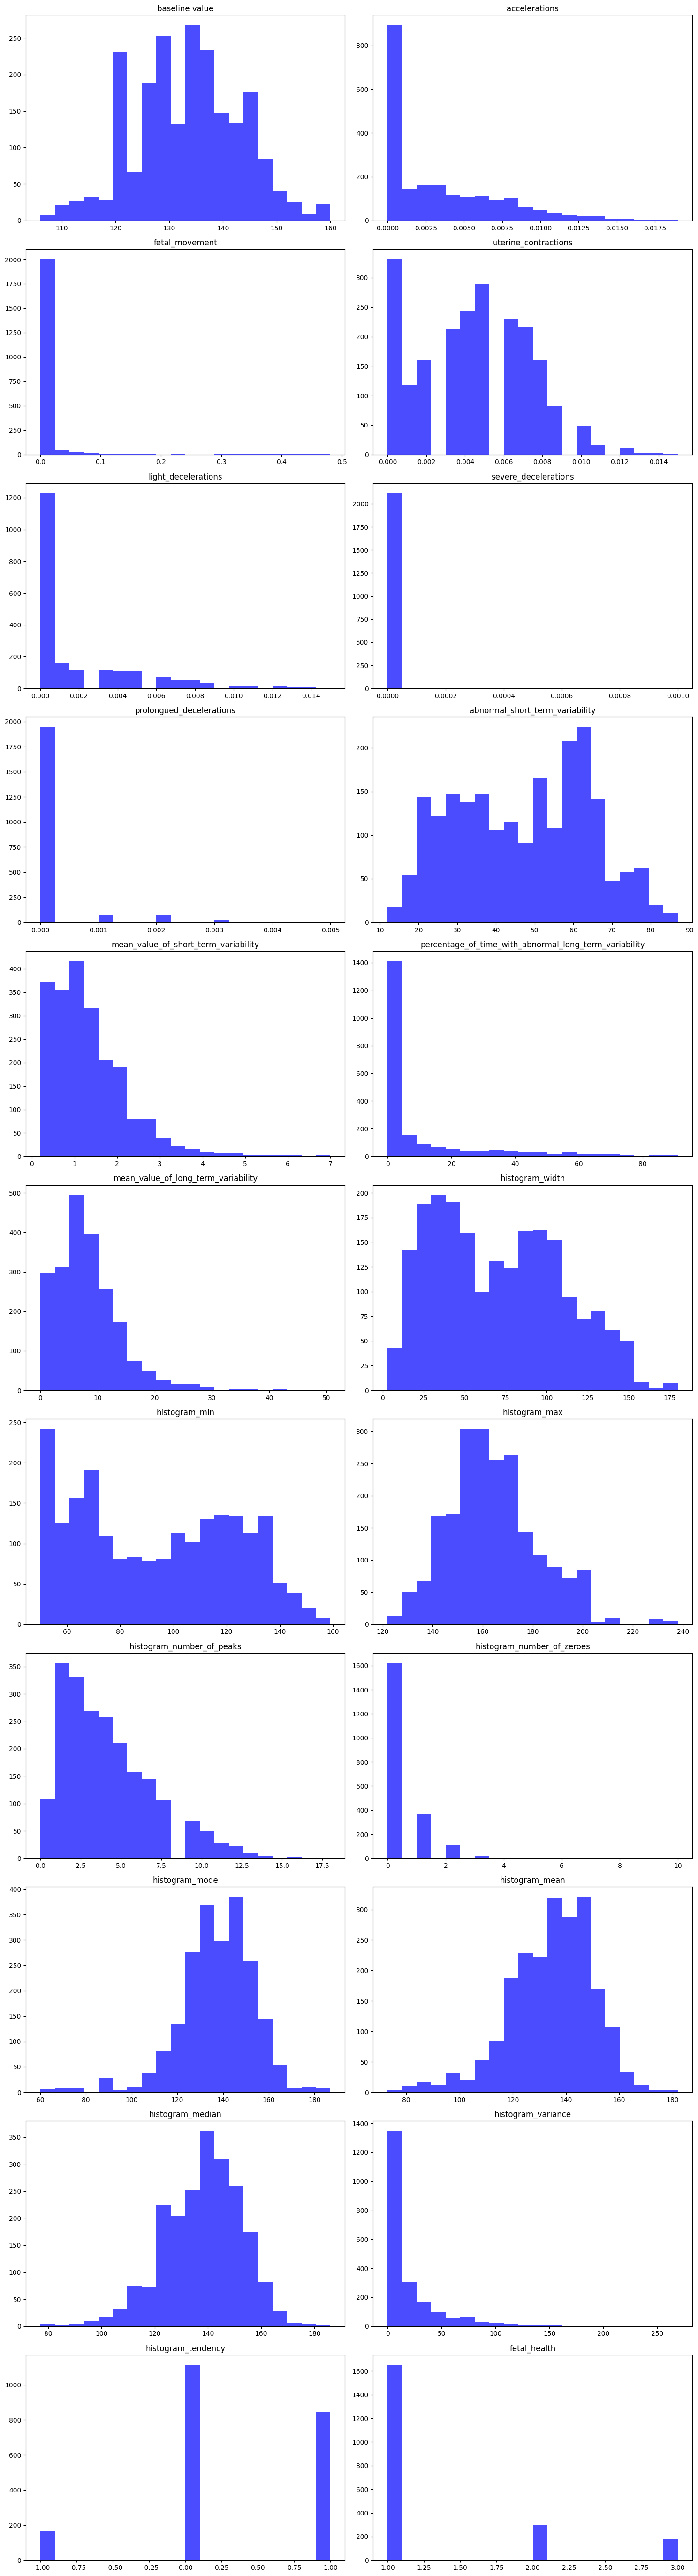

In [6]:
for col in fetal_df.columns :
    print(col,pd.unique(fetal_df[col]),sep="\n")
    print("\n\n")
    
fig, axes = plt.subplots(11, 2, figsize=(15,11 * 5))
axes = axes.ravel()
for i, col in enumerate(fetal_df.columns):
    axes[i].hist(fetal_df[col], bins=20, color='blue', alpha=0.7) 
    axes[i].set_title(col)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

From above unique values and histograms, it can be observed that only few variables show some kind of discrete nature which can be encoded into categorical values. These variables are mainly -- ***histogram_tendency, fetal_health, histogram_number_of_zeros, prolonged_decelerations,*** and ***severe_decelerations***, but based on the dataset description and logical definition of variables it can be inferred that only ***fetal_health*** and ***histogram_tendency*** variables are the only variables which can be properly categorized as classes. ***fetal_health*** feature, as mentioned in dataset description, can be one of three classes and ***histogram_tendency*** which by definition represents shape of histogram can be again categorized in classes. Therefore, this dataset only contain **2** categorical variables.

#### (m)

**Ordinal Encoding**

#### (n)

In [7]:
fetal_class = fetal_df.groupby(["fetal_health"]).size()
for cls,val in zip(fetal_class.index.values,fetal_class.values) :
    if cls==1 :
        print("Normal: ",val)
    elif cls==2 :
        print("Suspect: ",val)
    else :
        print("Pathological: ",val)

Normal:  1655
Suspect:  295
Pathological:  176


## **Dirty Dataset**

In [14]:
# load the dirty dataset csv file into a pandas dataframe

fetal_dirty_df = pd.read_csv('fetal_health_dataset_dirty.csv')

### Problem 1.2

#### (a)

In [15]:
# Converts 'NaN' values into 'True' and otherwise into 'False'
matA = fetal_dirty_df.isna().values
print(matA)

print("\n")

# Counts 'False' as 0 and 'True' as 1 and then gives sum of non-zero elements, and thus essentially gives number of NaN values
print("Number of NaN values:",np.count_nonzero(matA))

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


Number of NaN values: 86


#### (b)

In [16]:
# Converts 'NaN' values into 'True' and otherwise into 'False'
# Counts 'False' as 0 and 'True' as 1 and then gives sum across the columns
print(fetal_dirty_df.isna().sum(axis=0))

baseline value                                            47
accelerations                                              0
fetal_movement                                             0
uterine_contractions                                       0
light_decelerations                                        0
severe_decelerations                                       0
prolongued_decelerations                                   0
abnormal_short_term_variability                            0
mean_value_of_short_term_variability                       0
percentage_of_time_with_abnormal_long_term_variability    10
mean_value_of_long_term_variability                        0
histogram_width                                            0
histogram_min                                              0
histogram_max                                             24
histogram_number_of_peaks                                  0
histogram_number_of_zeroes                                 0
histogram_mode          

#### (c)

In [17]:
# Converts 'NaN' values into 'True' and otherwise into 'False'
# Counts 'False' as 0 and 'True' as 1 and then gives sum across the rows
s = fetal_dirty_df.isna().sum(axis=1)
display(s)
print("\n")

# Assign s all those rows where there are 1 or more NaN values
s = s[s > 0]
display(s)
print("\n")
print("Number of samples having missing values:",len(s))

0       0
1       0
2       0
3       0
4       0
       ..
2121    0
2122    0
2123    0
2124    0
2125    0
Length: 2126, dtype: int64

23      1
43      1
71      1
90      1
93      1
       ..
2034    1
2053    1
2059    1
2066    1
2109    1
Length: 86, dtype: int64



Number of samples having missing values: 86


### Problem 1.3

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2079 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   int64  
 8   mean_value_of_short_term_variability  

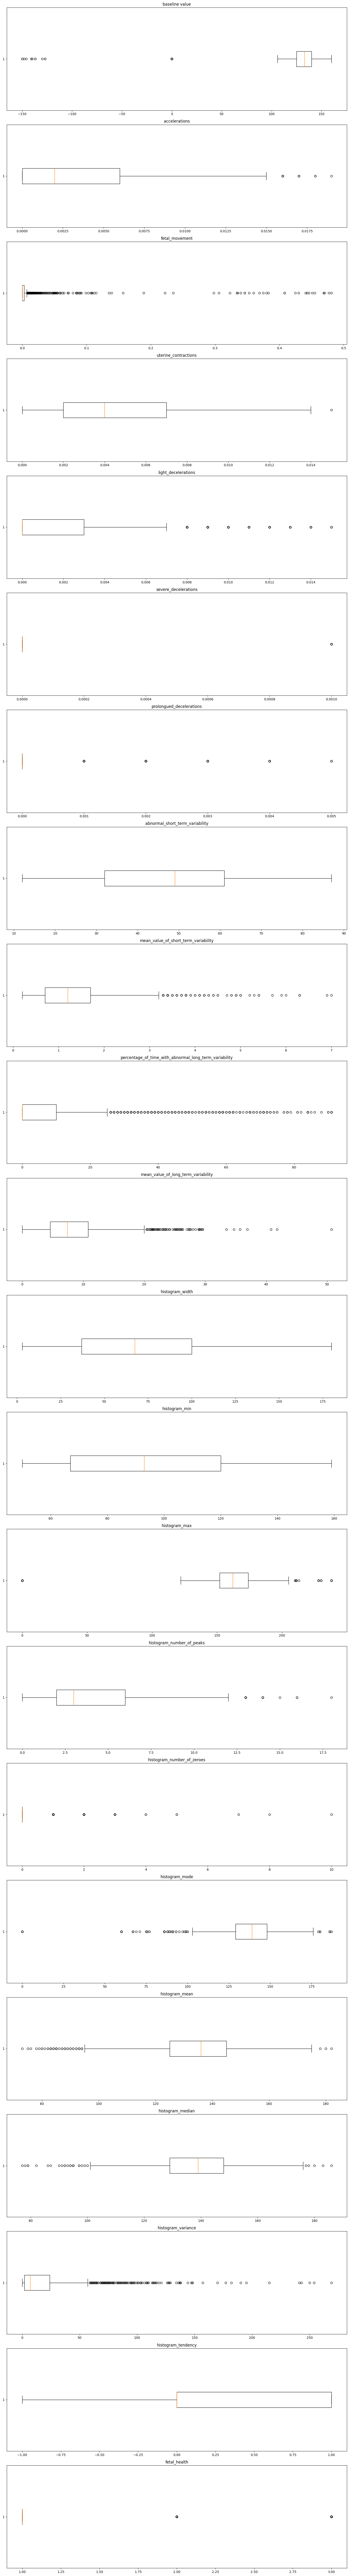

Count of NaN values before transformation: 47
Count of NaN values after transformation: 58


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
91,148.0,0.000,0.000,0.000,0.000,0.0,0.0,67,0.4,67.0,...,139,154.0,4,0,150.0,149,151,0,1,2
92,148.0,0.000,0.003,0.000,0.000,0.0,0.0,70,0.3,68.0,...,136,153.0,2,0,150.0,148,150,0,1,2
93,NaN,0.000,0.000,0.000,0.000,0.0,0.0,68,0.3,75.0,...,128,NaN,3,0,150.0,149,151,0,1,3
94,148.0,0.000,0.005,0.002,0.000,0.0,0.0,72,0.3,74.0,...,136,152.0,0,0,150.0,148,150,0,1,3
95,148.0,0.000,0.000,0.000,0.000,0.0,0.0,58,0.5,7.0,...,135,156.0,1,0,150.0,149,151,1,1,1
96,148.0,0.000,0.000,0.000,0.000,0.0,0.0,63,0.4,30.0,...,121,156.0,3,1,150.0,149,151,1,1,2
97,148.0,0.000,0.001,0.000,0.001,0.0,0.0,60,0.5,49.0,...,78,161.0,3,0,154.0,152,154,1,1,2
98,148.0,0.000,0.001,0.000,0.001,0.0,0.0,61,0.5,39.0,...,130,161.0,2,0,154.0,152,154,1,1,2
99,125.0,0.010,0.007,0.002,0.000,0.0,0.0,19,1.9,0.0,...,101,197.0,8,1,133.0,131,133,5,-1,1
100,125.0,0.005,0.000,0.002,0.003,0.0,0.0,25,1.7,6.0,...,72,165.0,3,0,133.0,128,132,10,0,1


In [18]:
# Printing dataframe info and unique values for all columns
print(fetal_dirty_df.info())
print("\n")
for col in fetal_dirty_df.columns :
    print(col,pd.unique(fetal_dirty_df[col]),sep="\n")
    print("\n\n")

# Plotting box plots for all columns to determine outliers
fig, axes = plt.subplots(22, 1, figsize=(15,22 * 5))
axes = axes.ravel()
for i, col in enumerate(fetal_dirty_df.columns):
    axes[i].boxplot(fetal_dirty_df[col].fillna(0),vert=False)
    axes[i].set_title(col)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

# Converting negative values in baseline value to NaN
print("Count of NaN values before transformation:",fetal_dirty_df['baseline value'].isna().sum(axis=0))
fetal_dirty_df_bckup = fetal_dirty_df.copy()
fetal_dirty_df['baseline value'] = fetal_dirty_df['baseline value'].map(lambda x: np.nan if x<0 else x,na_action='ignore')
print("Count of NaN values after transformation:",fetal_dirty_df['baseline value'].isna().sum(axis=0))

# Printing rows 91 to 100
display(fetal_dirty_df.loc[91:100])

After observing the **Dtype**, **Unique Values**, and **Outliers** for all the independent variables, it can be concluded that the variable **"baseline value"** has some kind of logical inconsistency. As per the definition of the feature, it is the FHR value or the number of heart beats per minute for a fetus and thus this value can't be negative, but as we have seen through above analysis that some values in **"baseline value"** variable are negative and thus they are inconsistent.

### Problem 1.4

In [19]:
scaler = StandardScaler()

for col in fetal_dirty_df.columns:
    if col!="fetal_health" and col!="histogram_tendency":
        fetal_dirty_df[col] = scaler.fit_transform(fetal_dirty_df[[col]])

display(fetal_dirty_df.head(20))

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,-1.351086,-0.822388,-0.203210,-1.482465,-0.638438,-0.057476,-0.268754,1.513190,-0.943095,1.809010,...,-1.068562,-2.126928,-0.701397,-0.458444,-1.064414,0.153270,-1.181642,1.870569,1,2
1,-0.131067,0.730133,-0.203210,0.554627,0.375243,-0.057476,-0.268754,-1.744751,0.868841,-0.532792,...,-0.865539,1.890868,0.655137,0.958201,0.216662,0.089126,0.132038,-0.234998,0,1
2,-0.029399,-0.046128,-0.203210,1.233657,0.375243,-0.057476,-0.268754,-1.802928,0.868841,-0.532792,...,-0.865539,1.890868,0.316003,0.958201,0.216662,0.024982,-0.006244,-0.200481,0,1
3,0.072269,-0.046128,-0.203210,1.233657,0.375243,-0.057476,-0.268754,-1.802928,1.208579,-0.532792,...,-1.373097,0.328392,2.350804,-0.458444,-0.027352,-0.039162,-0.075385,-0.200481,1,1
4,-0.131067,0.988886,-0.203210,1.233657,-0.638438,-0.057476,-0.268754,-1.802928,1.208579,-0.532792,...,-1.373097,0.328392,1.672537,-0.458444,-0.027352,0.089126,-0.006244,-0.269516,1,1
5,0.072269,-0.563635,-0.203210,1.912687,2.402604,-0.057476,3.122175,-1.221153,5.172188,-0.532792,...,-1.474609,2.002474,0.316003,3.791490,-3.748573,-1.771050,-2.149617,5.218765,0,3
6,0.072269,-0.563635,-0.203210,2.931233,2.064711,-0.057476,4.817640,-1.046621,5.625172,-0.532792,...,-1.474609,2.002474,0.655137,3.791490,-4.053591,-1.771050,-2.218758,6.772052,0,3
7,-1.147750,-0.822388,-0.203210,-1.482465,-0.638438,-0.057476,-0.268754,2.094965,-0.943095,-0.206029,...,-1.068562,-1.903717,-1.379664,-0.458444,-0.942407,-0.808890,-1.043360,-0.545656,1,3
8,-1.147750,-0.822388,-0.203210,-0.803434,-0.638438,-0.057476,-0.268754,2.153143,-0.943095,-0.260489,...,-1.068562,-1.903717,-1.379664,-0.458444,-0.942407,-0.808890,-1.043360,-0.545656,1,3
9,-1.147750,-0.822388,-0.203210,-0.463919,-0.638438,-0.057476,-0.268754,2.269498,-1.169587,-0.206029,...,-1.068562,-1.903717,-1.040530,-0.458444,-0.942407,-0.808890,-1.043360,-0.614691,1,3


### Problem 1.5

In [20]:
resp = "fetal_health"

grouped = fetal_dirty_df.groupby(resp)

for col in fetal_dirty_df.columns:
    if col!=resp:
        fetal_dirty_df[col] = grouped[col].transform(lambda x: x.fillna(x.median()))

### Problem 1.6

In [21]:
enc = OneHotEncoder(handle_unknown='ignore')

fetal_one_hot_df = pd.DataFrame(enc.fit_transform(fetal_dirty_df[["fetal_health"]]).toarray(),columns=["fetal_health_1","fetal_health_2","fetal_health_3"])

fetal_dirty_df = pd.concat([fetal_dirty_df,fetal_one_hot_df],axis=1)

fetal_dirty_df.to_csv("fetal_health_dataset_processed.csv",index=False)

# **2. Heart Failure Prediction Dataset**

## Problem 2.1

In [22]:
# load the dataset csv file into a pandas dataframe

heart_df = pd.read_csv('./heart_failure_dataset.csv')

### (a)

The given task is a **Supervised Machine Learning Task.** According to the description of dataset, based on the given features or columns in the dataset we have to predict whether a person dies of heart failure or not, which is essentially to classify each observation or row of the dataset into one of the two output classes. The presence of the ***DEATH_EVENT*** feature or column which indicates whether a person dies of heart failure during the follow up period, makes this dataset ***labelled*** and thus makes this task a **Supervised Machine Learning Task.**

### (b)

In [23]:
print("Axes:-",heart_df.axes,"Dtypes:-",heart_df.dtypes,sep="\n\n")

Axes:-

[RangeIndex(start=0, stop=299, step=1), Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')]

Dtypes:-

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object


### (c)



In [24]:
heart_df.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


### (d)

In [25]:
print("Rows:",heart_df.shape[0]," Columns:",heart_df.shape[1],sep=" ")

Rows: 299  Columns: 13


### (e)

Total number of Data Samples : **299**

### (f)

Total number of independent variables : **12.** They are as follows:-
1. age
2. anaemia
3. creatinine_phosphokinase
4. diabetes
5. ejection_fraction
6. high_blood_pressure
7. platelets
8. serum_creatinine
9. serum_sodium
10. sex
11. smoking
12. time

### (g)

Total number of dependent variables: **1**. It is **DEATH_EVENT**.

### (h)

n = **299** and p = **12**

### (i)

n = **299** and m = **1**

### (j)

age
[75.    55.    65.    50.    90.    60.    80.    62.    45.    49.
 82.    87.    70.    48.    68.    53.    95.    58.    94.    85.
 69.    72.    51.    57.    42.    41.    67.    79.    59.    44.
 63.    86.    66.    43.    46.    61.    81.    52.    64.    40.
 60.667 73.    77.    78.    54.    47.    56.   ]



anaemia
[0 1]



creatinine_phosphokinase
[ 582 7861  146  111  160   47  246  315  157  123   81  231  981  168
   80  379  149  125   52  128  220   63  148  112  122   60   70   23
  249  159   94  855 2656  235  124  571  127  588 1380  553  129  577
   91 3964   69  260  371   75  607  789  364 7702  318  109   68  250
  110  161  113 5882  224   92  102  203  336   76   55  280   78   84
  115   66  897  154  144  133  514   59  156   61  305  898 5209   53
  328  748 1876  936  292  369  143  754  400   96  737  358  200  248
  270 1808 1082  719  193 4540  646  281 1548  805  291  482  943  185
  132 1610 2261  233   30 1846  335   58  910   72  130 2334

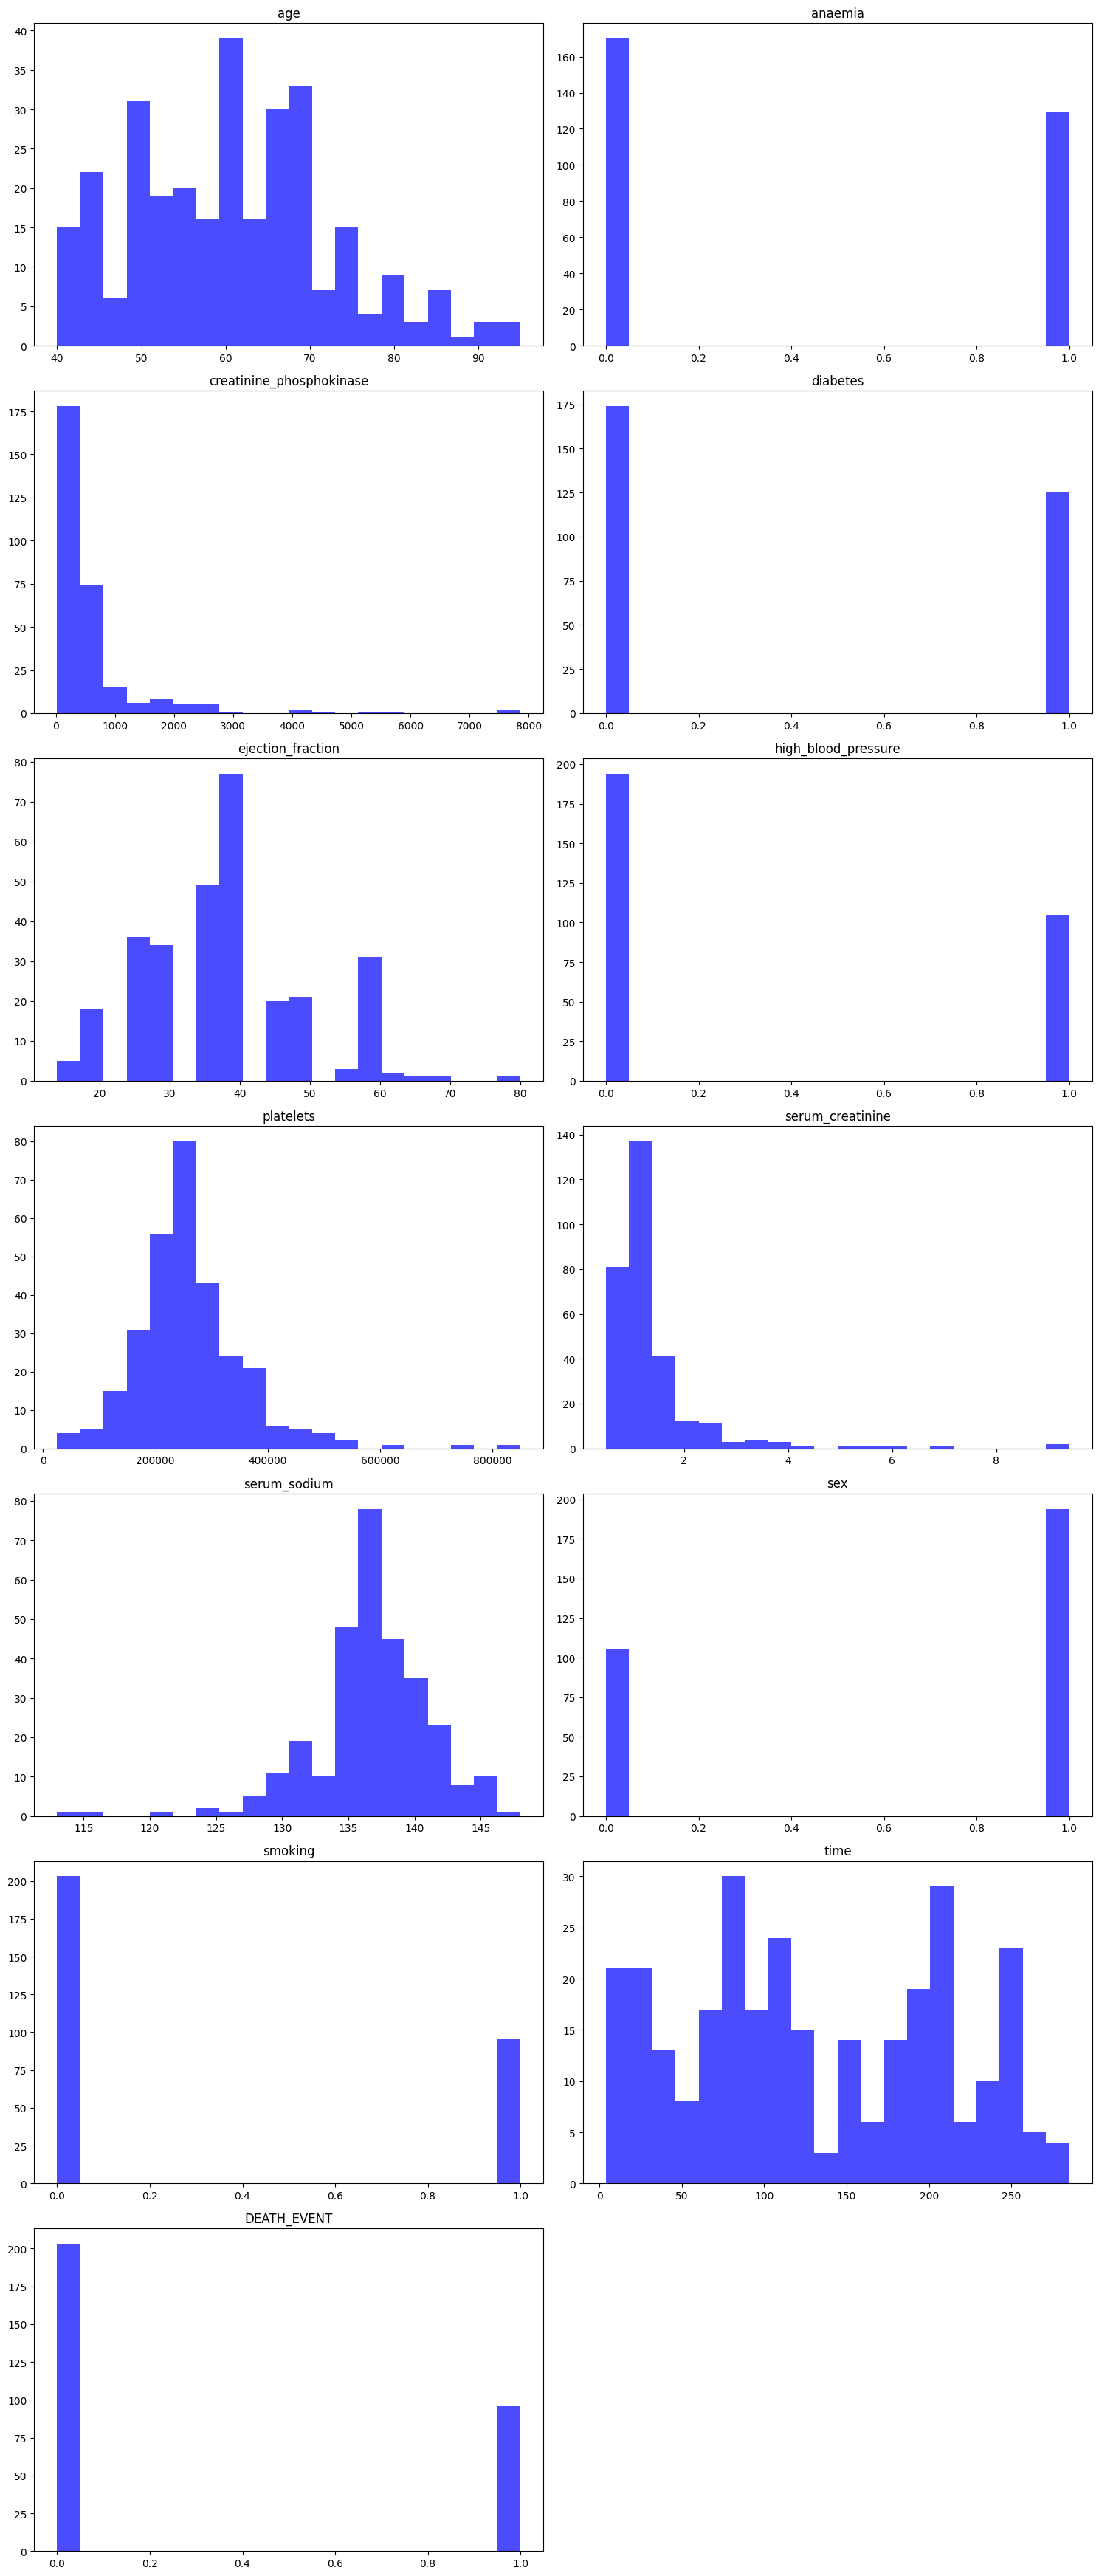

In [26]:
for col in heart_df.columns :
    print(col,pd.unique(heart_df[col]),sep="\n")
    print("\n\n")
    
fig, axes = plt.subplots(7, 2, figsize=(15,7 * 5))
axes = axes.ravel()
for i, col in enumerate(heart_df.columns):
    axes[i].hist(heart_df[col], bins=20, color='blue', alpha=0.7) 
    axes[i].set_title(col)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

From above unique values and histograms, it can be observed that only few variables show some kind of discrete nature ranging over only 0 or 1 and so can be encoded into categorical values. These variables are mainly -- **anaemia, diabeters, high_blood_pressue, sex, smoking** and **DEATH_EVENT**. Also referring the dataset description and logical definition of variables it can be inferred as well that these are the only variables which can be properly categorized as classes. The above variables takes only **binary values** which is another indication that they can be encoded. Therefore, this dataset contains **6** categorical variables.

### (k)

**Nominal Encoding**

### (l)

In [27]:
death_class = heart_df.groupby(["DEATH_EVENT"]).size()
for cls,val in zip(death_class.index.values,death_class.values) :
    if cls==0 :
        print("Remaining Paitients: ",val)
    else:
        print("Deceased Patients: ",val)


Remaining Paitients:  203
Deceased Patients:  96


### (m)

In [28]:
sex_class = heart_df.groupby(["sex"]).size()
for cls,val in zip(sex_class.index.values,sex_class.values) :
    if cls==0 :
        print("Women: ",val)
    else:
        print("Men: ",val)

Women:  105
Men:  194


### (n)

In [29]:
smoking_class = heart_df.groupby(["smoking"]).size()
for cls,val in zip(smoking_class.index.values,smoking_class.values) :
    if cls==0 :
        print("Non-smokers: ",val)
    else:
        print("Smokers: ",val)

Non-smokers:  203
Smokers:  96


## Problem 2.2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB
None


age
[75.   

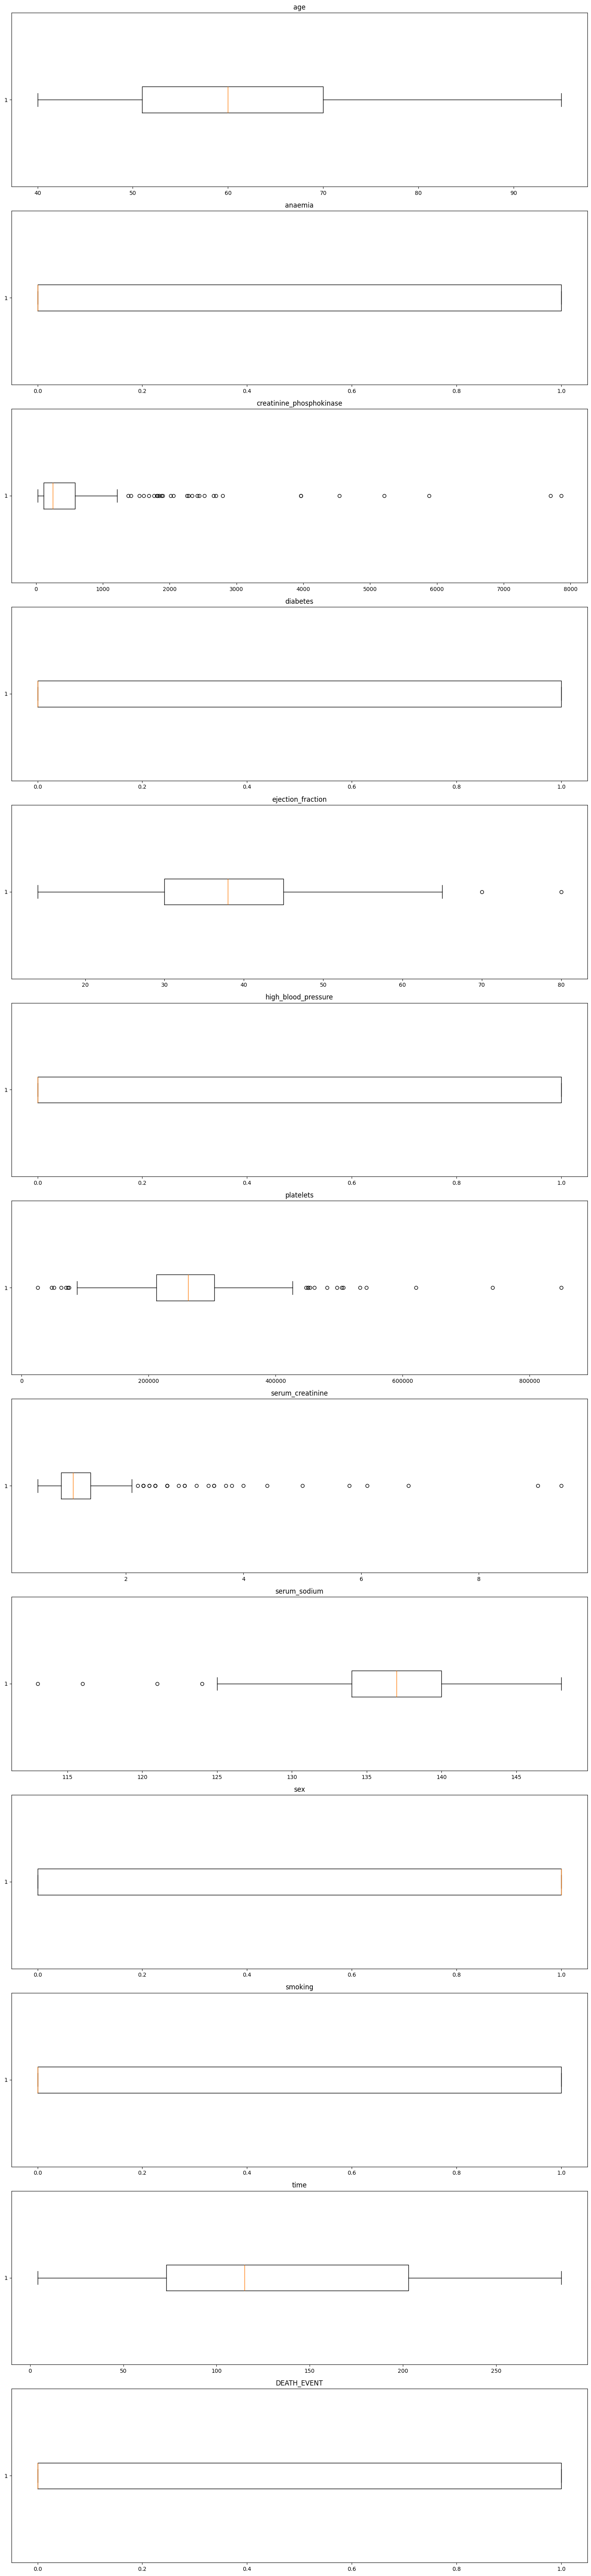

Count of NaN values before transformation: 0
Count of NaN values after transformation: 2


In [30]:
# Printing dataframe info and unique values for all columns
print(heart_df.info())
print("\n")
for col in heart_df.columns :
    print(col,pd.unique(heart_df[col]),sep="\n")
    print("\n\n")

# Plotting box plots for all columns to determine outliers
fig, axes = plt.subplots(13, 1, figsize=(15,13 * 5))
axes = axes.ravel()
for i, col in enumerate(heart_df.columns):
    axes[i].boxplot(heart_df[col].fillna(0),vert=False)
    axes[i].set_title(col)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

print("Count of NaN values before transformation:",heart_df['age'].isna().sum(axis=0))
heart_df_bckup = heart_df.copy()
heart_df['age'] = heart_df['age'].map(lambda x: x if x==int(x) else np.nan,na_action='ignore')
print("Count of NaN values after transformation:",heart_df['age'].isna().sum(axis=0))

After observing the **Dtype**, **Unique Values**, and **Outliers** for all the features, it can be concluded that the variable **"age"** has some kind of logical inconsistency. As per the definition of the feature, it is the age of a person in years and can be only an integer, but as we have seen through above analysis that some values in **"age"** variable are fractional and thus they are inconsistent.

## Problem 2.3

In [31]:
scaler = StandardScaler()
cat_cols = set(["anaemia", "diabetes", "high_blood_pressue", "sex", "smoking","DEATH_EVENT"])

for col in heart_df.columns:
    if col not in cat_cols:
        heart_df[col] = scaler.fit_transform(heart_df[[col]])

display(heart_df.head(20))

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,1.188855,0,0.000166,0,-1.530560,1.359272,1.681648e-02,0.490057,-1.504036,1,0,-1.629502,1
1,-0.489728,0,7.514640,0,-0.007077,-0.735688,7.535660e-09,-0.284552,-0.141976,1,0,-1.603691,1
2,0.349564,0,-0.449939,0,-1.530560,-0.735688,-1.038073e+00,-0.090900,-1.731046,1,1,-1.590785,1
3,-0.909374,1,-0.486071,0,-1.530560,-0.735688,-5.464741e-01,0.490057,0.085034,1,0,-1.590785,1
4,0.349564,1,-0.435486,1,-1.530560,-0.735688,6.517986e-01,1.264666,-4.682176,0,0,-1.577879,1
5,2.447793,1,-0.552141,0,0.162199,1.359272,-6.079240e-01,0.683709,-1.050016,1,1,-1.577879,1
6,1.188855,1,-0.346704,0,-1.953749,-0.735688,-1.396531e+00,-0.187726,0.085034,1,0,-1.552067,1
7,-0.070082,1,-0.275472,1,1.854958,-0.735688,1.952488e+00,-0.284552,-1.277026,1,1,-1.552067,1
8,0.349564,0,-0.438583,0,2.278147,-0.735688,7.535660e-09,0.102752,0.312044,0,0,-1.552067,1
9,1.608501,1,-0.473683,0,-0.260991,1.359272,1.276539e+00,7.752020,-0.823006,1,1,-1.552067,1


## Problem 2.4

In [32]:
enc = OneHotEncoder(handle_unknown='ignore')

heart_one_hot_df = pd.DataFrame(enc.fit_transform(heart_df[["DEATH_EVENT"]]).toarray(),columns=["DEATH_EVENT_0","DEATH_EVENT_1"])

heart_df = pd.concat([heart_df,heart_one_hot_df],axis=1)

heart_df.to_csv("heart_failure_dataset_processed.csv",index=False)

## Problem 2.5

In [33]:
display(heart_df.corr())

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,DEATH_EVENT_0,DEATH_EVENT_1
age,1.000000,0.088509,-0.081689,-0.101377,0.060124,0.093693,-0.052505,0.159216,-0.045982,0.065663,0.018632,-0.224232,0.254871,-0.254871,0.254871
anaemia,0.088509,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270,-0.066270,0.066270
creatinine_phosphokinase,-0.081689,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728,-0.062728,0.062728
diabetes,-0.101377,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943,0.001943,-0.001943
ejection_fraction,0.060124,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603,0.268603,-0.268603
high_blood_pressure,0.093693,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351,-0.079351,0.079351
platelets,-0.052505,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139,0.049139,-0.049139
serum_creatinine,0.159216,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278,-0.294278,0.294278
serum_sodium,-0.045982,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204,0.195204,-0.195204
sex,0.065663,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316,0.004316,-0.004316


### (a)

The two most positively coorelated variables with **DEATH_EVENT** are **serum_creatinine** and **age**.

### (b)

The two most negatively coorelated variables with **DEATH_EVENT** are **time** and **ejection_fraction**.

### (c)

The second most positively correlated variable with **DEATH_EVENT** is **age**. This correlation is consistent with the fact that people with higher age have a higher chance or risk of heart failure than people with lower age, and thus people with high age have higher probability of DEATH_EVENT being 1.

### (d)

**time** : As per the definition, it is the number of follow-up days to visit a doctor and if a person dies then it is the number of follow-up days before a person died during the follow-up period, and so higher the value of this variable is, lower is the chance of that person dying as they are regularly visiting for follow-up and thus are alive. So the **time** variable is negatively correlated with the **DEATH_EVENT**, higher the value of **time** makes **DEATH_EVENT** tends to 0 and vice versa.

**ejection_fraction**: As per the definition, it is the percentage of blood leaving the heart after each contraction. This implies that the larger this value is, higher is the chance that the heart is not functioning properly as large amount of blood loss from heart is an indicator of some underlying issue and thus the probability of that person dying increases. So the **ejection_fraction** variable is negatively correlated with the **DEATH_EVENT**, higher the value of **ejection_fraction** makes **DEATH_EVENT** tends to 0 and vice versa.